# Рассчет профилей спектральных линий в приближении Милна-Эддингтона

Входные параметры функции
------
- line_vec - вектор параметров линии (постоянны при решении обратной задачи):
    + wl0 - центральная длина волны линии (в ангстремах), 
    + g - Ланде-фактор линии
    + mu - косинус угла между LOS и нормалью поверхности 
- param_vec - вектор параметров инверсии (подбираются при решении обратной задачи):
    + B - величина магнитного поля (в гауссах)
    + theta - угол наклона магнитного поля (в радианах)
    + xi - азимут магнитного поля (в радианах)
    + D - доплеровское уширение линии (в миллиангстремах)
    + gamma - лоренцовское затухание линии (в миллиангстремах)
    + Dop_shift - доплеровский сдвиг линии (в миллиангстремах)
- x - точка рассчета параметров IQUV (в миллиангстремах от центральной длины волны)

    

Выход функции
-------

In [26]:
import ME
ME.ME([6302.5, 2.5, 1], [100, 20, 20, 50, 50, 10, 10000, 0.5, 0], 100)

array([10109.68204214,   -74.60026281,   104.49586114,   352.66748818])

Функция возвращает вектор Стокса IQUV в заданной точке

Построение модельной спектрограммы
------


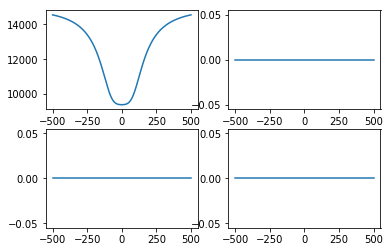

In [5]:
import numpy as np
import matplotlib.pyplot as plt
xx = np.linspace(-500, 500, 1000)
l_v = [6302.5, 2.5, 1]
p_v = [0, 0, 0, 50, 50, 10, 10000, 0.5, 0]
I = list(ME.ME(l_v, p_v, xx[i])[0] for i in range(len(xx)))
Q = list(ME.ME(l_v, p_v, xx[i])[1] for i in range(len(xx)))
U = list(ME.ME(l_v, p_v, xx[i])[2] for i in range(len(xx)))
V = list(ME.ME(l_v, p_v, xx[i])[3] for i in range(len(xx)))

plt.subplot(221)
plt.plot(xx, I)

plt.subplot(222)
plt.plot(xx, Q)

plt.subplot(223)
plt.plot(xx, U)

plt.subplot(224)
plt.plot(xx, V)

plt.show()

Магнитного поля нет - ненулевая только компонента I

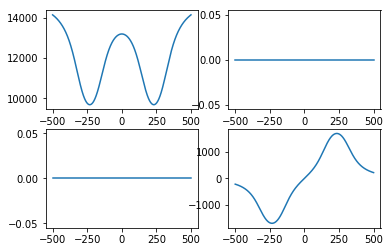

In [23]:
l_v = [6302.5, 2.5, 1]
p_v = [500, 0, 0, 50, 50, 10, 10000, 0.5, 0]
I = list(ME.ME(l_v, p_v, xx[i])[0] for i in range(len(xx)))
Q = list(ME.ME(l_v, p_v, xx[i])[1] for i in range(len(xx)))
U = list(ME.ME(l_v, p_v, xx[i])[2] for i in range(len(xx)))
V = list(ME.ME(l_v, p_v, xx[i])[3] for i in range(len(xx)))

plt.subplot(221)
plt.plot(xx, I)

plt.subplot(222)
plt.plot(xx, Q)

plt.subplot(223)
plt.plot(xx, U)

plt.subplot(224)
plt.plot(xx, V)

plt.show()

Продольное магнитное поле - компоненты Q и U нулевые

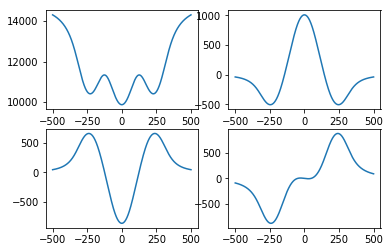

In [22]:
l_v = [6302.5, 2.5, 1]
p_v = [500, 20, 20, 50, 50, 10, 10000, 0.5, 0]
I = list(ME.ME(l_v, p_v, xx[i])[0] for i in range(len(xx)))
Q = list(ME.ME(l_v, p_v, xx[i])[1] for i in range(len(xx)))
U = list(ME.ME(l_v, p_v, xx[i])[2] for i in range(len(xx)))
V = list(ME.ME(l_v, p_v, xx[i])[3] for i in range(len(xx)))

plt.subplot(221)
plt.plot(xx, I)

plt.subplot(222)
plt.plot(xx, Q)

plt.subplot(223)
plt.plot(xx, U)

plt.subplot(224)
plt.plot(xx, V)

plt.show()

Функция с коэффициентом заполнения
-----


Функция ME_ff аналогична предыдущей, но с введением двух дополнительных параметров инверсии - коэффициента заполнения элемента магнитным полем (filling factor) и доплеровского сдвига для немагнитной части элемента

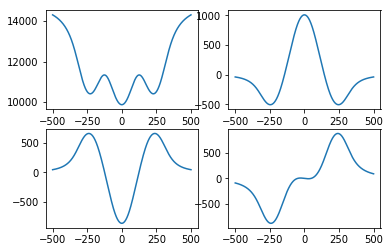

In [21]:
l_v = [6302.5, 2.5, 1]
p_v = [500, 20, 20, 50, 50, 10, 10000, 0.5, 0, 1, 0]
I = list(ME.ME_ff(l_v, p_v, xx[i])[0] for i in range(len(xx)))
Q = list(ME.ME_ff(l_v, p_v, xx[i])[1] for i in range(len(xx)))
U = list(ME.ME_ff(l_v, p_v, xx[i])[2] for i in range(len(xx)))
V = list(ME.ME_ff(l_v, p_v, xx[i])[3] for i in range(len(xx)))

plt.subplot(221)
plt.plot(xx, I)

plt.subplot(222)
plt.plot(xx, Q)

plt.subplot(223)
plt.plot(xx, U)

plt.subplot(224)
plt.plot(xx, V)

plt.show()

Коэффициент заполнения = 1, профили полностью соответствуют примеру выше

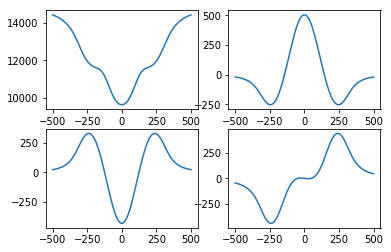

In [20]:
l_v = [6302.5, 2.5, 1]
p_v = [500, 20, 20, 50, 50, 10, 10000, 0.5, 0, 0.5, 0]
I = list(ME.ME_ff(l_v, p_v, xx[i])[0] for i in range(len(xx)))
Q = list(ME.ME_ff(l_v, p_v, xx[i])[1] for i in range(len(xx)))
U = list(ME.ME_ff(l_v, p_v, xx[i])[2] for i in range(len(xx)))
V = list(ME.ME_ff(l_v, p_v, xx[i])[3] for i in range(len(xx)))

plt.subplot(221)
plt.plot(xx, I)

plt.subplot(222)
plt.plot(xx, Q)

plt.subplot(223)
plt.plot(xx, U)

plt.subplot(224)
plt.plot(xx, V)

plt.show()

Коэффициент заполнения = 0.5, только половина элемента заполнена магнитным полем.